In [22]:
# Import our dependencies
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Import our input dataset
GeneticDisorder_df = pd.read_csv(
    Path("..") / "Resources" / "train.csv"
)
GeneticDisorder_df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [24]:
# Remove MYOPIC target from features data
y = ['Genetic Disorder']
X = GeneticDisorder_df.drop(columns=['Genetic Disorder'])



In [25]:
# Generate synthetic data for testing
X, y = make_blobs(n_samples=1000, n_features=24, centers=2, random_state=1, cluster_std=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [26]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [27]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=24))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7640
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9693
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 11/

In [29]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 1.000


8/8 [==============================] - 0s 1ms/step


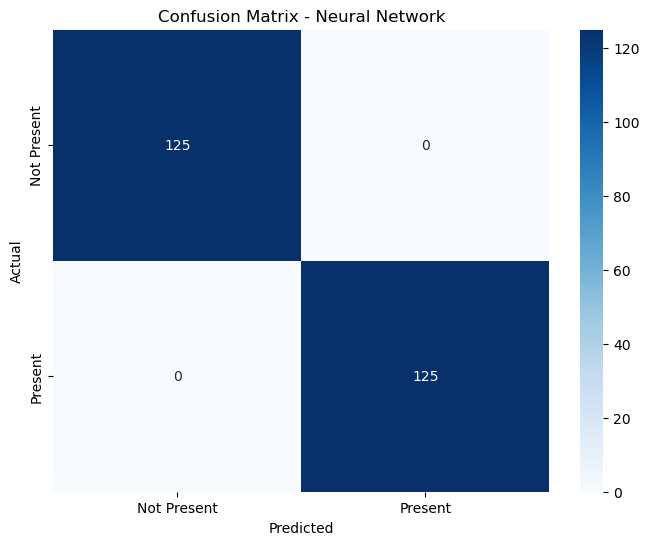

In [31]:
# Get predictions for the neural network model
y_pred_nn_probs = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)

# Generate confusion matrix for neural network
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix heatmap for neural network
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Present', 'Present'], yticklabels=['Not Present', 'Present'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
